<a href="https://colab.research.google.com/github/abhi005/stock-prediction-with-LSTM/blob/master/stock_price_prediction_with_lstm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install nsepy

### Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import datetime as dt

### Preprocessing data

In [ ]:
stk_data = pd.read_csv('drive/My Drive/Colab Notebooks/SBIN_stock_data.csv')

In [ ]:
stk_data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,1996-01-01,SBIN,EQ,198.10,198.10,201.15,196.50,NaN,199.50,199.20,4126350,8.219580e+13,NaN,NaN,NaN
1,1996-01-02,SBIN,EQ,199.50,200.25,201.00,188.00,NaN,193.15,195.94,5299500,1.038380e+14,NaN,NaN,NaN
2,1996-01-03,SBIN,EQ,193.15,194.25,196.80,187.00,NaN,188.00,191.64,6443900,1.234929e+14,NaN,NaN,NaN
3,1996-01-04,SBIN,EQ,188.00,185.50,189.00,182.55,NaN,187.35,185.00,8121250,1.502404e+14,NaN,NaN,NaN
4,1996-01-05,SBIN,EQ,187.35,188.00,188.50,185.05,NaN,186.30,186.70,7228600,1.349576e+14,NaN,NaN,NaN


In [ ]:
stk_data['Date'] = stk_data.index
data = pd.DataFrame(columns=['date', 'prev_close', 'open', 'high', 'low', 'close'])
data.date = stk_data['Date']
data.prev_close = stk_data['Prev Close']
data.open = stk_data['Open']
data.high = stk_data['High']
data.low = stk_data['Low']
data.close = stk_data['Close']

In [ ]:
data.head()

,date,prev_close,open,high,low,close
0,0,198.10,198.10,201.15,196.50,199.50
1,1,199.50,200.25,201.00,188.00,193.15
2,2,193.15,194.25,196.80,187.00,188.00
3,3,188.00,185.50,189.00,182.55,187.35
4,4,187.35,188.00,188.50,185.05,186.30


In [ ]:
train_set = data.iloc[:-20, 1:3].values
print(train_set.shape)

(6091, 2)


### Feature Scaling

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc_1 = MinMaxScaler(feature_range = (0, 1))
sc_2 = MinMaxScaler(feature_range = (0, 1))
train_set_scaled_prev_close = sc_1.fit_transform(train_set[:, 0].reshape(-1, 1))
print(train_set_scaled_pre_close.shape)
train_set_scaled_open = sc_2.fit_transform(train_set[:, 1].reshape(-1, 1))
train_set_scaled = np.concatenate((train_set_scaled_prev_close, train_set_scaled_open), axis=1)

(6091, 1)


In [ ]:
print(train_set_scaled.shape)

(6091, 2)


In [ ]:
X_train = []
y_train = []
for i in range(60, len(train_set_scaled)):
  X_train.append(train_set_scaled[i-60 : i, :])
  y_train.append(train_set_scaled[i, 1])
X_train, y_train = np.array(X_train), np.array(y_train)

In [ ]:
print(X_train.shape)

(6031, 60, 2)


In [ ]:
#X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 2))
print(X_train)

[[[0.05676299 0.01643294]
  [0.05716414 0.01707241]
  [0.05534463 0.01528784]
  ...
  [0.06554535 0.02559374]
  [0.06504391 0.02592091]
  [0.06624737 0.02627783]]

 [[0.05716414 0.01707241]
  [0.05534463 0.01528784]
  [0.05386897 0.01268534]
  ...
  [0.06504391 0.02592091]
  [0.06624737 0.02627783]
  [0.06735054 0.0278542 ]]

 [[0.05534463 0.01528784]
  [0.05386897 0.01268534]
  [0.05368272 0.01342891]
  ...
  [0.06624737 0.02627783]
  [0.06735054 0.0278542 ]
  [0.06745082 0.02592091]]

 ...

 [[0.06399805 0.02508811]
  [0.06164845 0.02324406]
  [0.06166277 0.01787547]
  ...
  [0.05076004 0.00807519]
  [0.05133311 0.01041001]
  [0.04977149 0.01045462]]

 [[0.06164845 0.02324406]
  [0.06166277 0.01787547]
  [0.05835327 0.01864878]
  ...
  [0.05133311 0.01041001]
  [0.04977149 0.01045462]
  [0.04954226 0.00837262]]

 [[0.06166277 0.01787547]
  [0.05835327 0.01864878]
  [0.0601298  0.01402376]
  ...
  [0.04977149 0.01045462]
  [0.04954226 0.00837262]
  [0.04955658 0.00878902]]]


### Building and Training RNN

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
regressor = Sequential()

In [ ]:
regressor.add(LSTM(units=50,return_sequences=True, input_shape=(X_train.shape[1], 2)))
regressor.add(Dropout(0.3))

In [ ]:
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.3))

In [ ]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.3))

In [ ]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.3))

In [ ]:
regressor.add(Dense(units = 1))

In [ ]:
regressor.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
regressor.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
6031/6031 [==============================] - 29s 5ms/step - loss: 0.0060
Epoch 2/20
6031/6031 [==============================] - 26s 4ms/step - loss: 0.0034
Epoch 3/20
6031/6031 [==============================] - 27s 4ms/step - loss: 0.0026
Epoch 4/20
6031/6031 [==============================] - 25s 4ms/step - loss: 0.0023
Epoch 5/20
6031/6031 [==============================] - 27s 4ms/step - loss: 0.0025
Epoch 6/20
6031/6031 [==============================] - 28s 5ms/step - loss: 0.0021
Epoch 7/20
6031/6031 [==============================] - 26s 4ms/step - loss: 0.0021
Epoch 8/20
6031/6031 [==============================] - 26s 4ms/step - loss: 0.0018
Epoch 9/20
6031/6031 [==============================] - 26s 4ms/step - loss: 0.0017
Epoch 10/20
6031/6031 [==============================] - 26s 4ms/step - loss: 0.0018
Epoch 11/20
6031/6031 [==============================] - 27s 5ms/step - loss: 0.0018
Epoch 12/20
6031/6031 [==============================] - 29s 5ms/step - lo

In [ ]:
inputs = data.iloc[len(data) - 20 - 60 :, 1 : 3].values
print(inputs.shape)
test_set_scaled_prev_close = sc_1.transform(inputs[:, 0].reshape(-1, 1))
print(test_set_scaled_prev_close.shape)
test_set_scaled_open = sc_2.transform(inputs[:, 1].reshape(-1, 1))
print(test_set_scaled_open.shape)
test_set_scaled = np.concatenate((test_set_scaled_prev_close, test_set_scaled_open), axis=1)
print(test_set_scaled.shape)

(80, 2)
(80, 1)
(80, 1)
(80, 2)


In [ ]:
print(test_set_scaled)

[[0.05835327 0.01864878]
 [0.0601298  0.01402376]
 [0.05203513 0.01430632]
 [0.05249359 0.01045462]
 [0.05441339 0.01448478]
 [0.05523002 0.01759291]
 [0.05614694 0.01402376]
 [0.05355378 0.01461862]
 [0.05640482 0.01521348]
 [0.05345349 0.01329506]
 [0.05028725 0.01235816]
 [0.05341051 0.01191202]
 [0.05243628 0.01342891]
 [0.05379733 0.01307199]
 [0.05257955 0.01313148]
 [0.05225003 0.01164433]
 [0.05401224 0.01580834]
 [0.05537329 0.01521348]
 [0.05515838 0.01342891]
 [0.05293772 0.01268534]
 [0.05406954 0.01335455]
 [0.05349647 0.01223919]
 [0.05150504 0.01209048]
 [0.05183455 0.01164433]
 [0.05280878 0.01253662]
 [0.05447069 0.01506477]
 [0.05458531 0.01177818]
 [0.05124715 0.01134691]
 [0.04882591 0.00841723]
 [0.04902649 0.008328  ]
 [0.0489262  0.00880389]
 [0.0477514  0.00746546]
 [0.04740756 0.0063501 ]
 [0.04782303 0.01061821]
 [0.0498861  0.00835775]
 [0.0481239  0.00746546]
 [0.04767977 0.00700445]
 [0.0444992  0.00435733]
 [0.04378286 0.0030189 ]
 [0.04395478 0.00321223]


In [ ]:
X_test = []
for i in range(60, len(test_set_scaled)):
  X_test.append(test_set_scaled[i-60 : i, :])
X_test = np.array(X_test)

In [ ]:
print(X_test.shape)

(20, 60, 2)


In [ ]:
print(X_test)

[[[0.05835327 0.01864878]
  [0.0601298  0.01402376]
  [0.05203513 0.01430632]
  ...
  [0.04954226 0.00837262]
  [0.04955658 0.00878902]
  [0.05147638 0.01113871]]

 [[0.0601298  0.01402376]
  [0.05203513 0.01430632]
  [0.05249359 0.01045462]
  ...
  [0.04955658 0.00878902]
  [0.05147638 0.01113871]
  [0.05286609 0.01253662]]

 [[0.05203513 0.01430632]
  [0.05249359 0.01045462]
  [0.05441339 0.01448478]
  ...
  [0.05147638 0.01113871]
  [0.05286609 0.01253662]
  [0.05378301 0.01390479]]

 ...

 [[0.05537329 0.01521348]
  [0.05515838 0.01342891]
  [0.05293772 0.01268534]
  ...
  [0.05704953 0.01640319]
  [0.05604665 0.01664114]
  [0.05521569 0.01470785]]

 [[0.05515838 0.01342891]
  [0.05293772 0.01268534]
  [0.05406954 0.01335455]
  ...
  [0.05604665 0.01664114]
  [0.05521569 0.01470785]
  [0.05331022 0.01341404]]

 [[0.05293772 0.01268534]
  [0.05406954 0.01335455]
  [0.05349647 0.01223919]
  ...
  [0.05521569 0.01470785]
  [0.05331022 0.01341404]
  [0.05266551 0.01253662]]]


In [ ]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc_2.inverse_transform(predicted_stock_price)
real_stock_price = data.iloc[-20:, 2].values

In [ ]:
print(predicted_stock_price)

[[172.5783 ]
 [173.52689]
 [176.54752]
 [181.1067 ]
 [185.03323]
 [187.45486]
 [188.03864]
 [186.89195]
 [184.59877]
 [182.57645]
 [181.68881]
 [181.96512]
 [183.09177]
 [184.68098]
 [186.63083]
 [189.1764 ]
 [191.98361]
 [194.02487]
 [194.36977]
 [192.87634]]


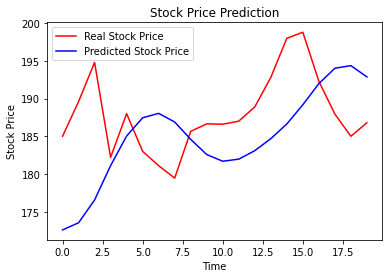

In [ ]:
plt.plot(real_stock_price, color = 'red', label = 'Real Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [ ]:
regressor.save('rnn_stock_price_model.h5')